In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import numpy as np

In [2]:
import date_timeUtils as dtu

In [3]:
csv_path = ".."
csv_name = "Biogeochemistry/*.csv"

In [4]:
csv_list = dtu.get_file_paths(csv_path, csv_name, False)

In [5]:
N_blank_df = pd.read_csv(csv_list['Biogeochemistry'][2])

In [6]:
N_blank_df['Time_collected'] = pd.to_datetime(N_blank_df['Time_collected'], format='%H:%M:%S')
# dummy variable for plotting time in fig 1
dt_range = pd.date_range("1900-01-01 10:20:00", "1900-01-01 10:30:00", freq="2min")

In [7]:
# get Cl background
bg_mean = pd.concat([N_blank_df['Cl mg/L'].iloc[:2], N_blank_df['Cl mg/L'].iloc[-2:]]).mean()

In [8]:
N_blank_df['Cl_bg_corrected'] = N_blank_df['Cl mg/L'] - bg_mean
N_blank_df['N:Cl'] = N_blank_df['N-NO3 mg/L'] / N_blank_df['Cl_bg_corrected']

In [9]:
# Part 2
reach_length = 70 # m
cl_N_ratio = 0.0543 # unitless
N_blank_df['S_w'] = -1 / ((N_blank_df['N:Cl'] - cl_N_ratio) / reach_length) # m

In [10]:
width = 0.25 # m
Q = 2.83 * 60 # L min-1
# step 1 - calculate the concentration of the N tracer for each grab sample
N_blank_df['no3_conc'] = cl_N_ratio * N_blank_df['Cl_bg_corrected']

# step 2 - calculate the geometric mean of N concentrations for each grab sample
N_blank_df['N_add-dyn'] = np.sqrt(N_blank_df['N-NO3 mg/L'] * N_blank_df['no3_conc'])

# step 3 - units: mg m-2 min-1. Converted to ug plotting function for figure 1.
N_blank_df['U_add'] = (Q / width) * (N_blank_df['N_add-dyn'] / N_blank_df['S_w'])

In [11]:
N_blank_df

,Reach,Sample,Injection,Date_collected,Time_collected,Cl mg/L,N-NO3 mg/L,Cl_bg_corrected,N:Cl,S_w,no3_conc,N_add-dyn,U_add
0,1,Bottom BG1,N,1/17/19,1900-01-01 09:30:00,0.61,0.00,-0.02,-0.000000,1289.134438,-0.001086,-0.000000,-0.000000
1,1,Top BG1,N,1/17/19,1900-01-01 09:35:00,0.64,0.00,0.01,0.000000,1289.134438,0.000543,0.000000,0.000000
2,1,1,N,1/17/19,1900-01-01 10:20:30,0.60,0.00,-0.03,-0.000000,1289.134438,-0.001629,-0.000000,-0.000000
3,1,2,N,1/17/19,1900-01-01 10:21:22,0.59,0.00,-0.04,-0.000000,1289.134438,-0.002172,-0.000000,-0.000000
4,1,3,N,1/17/19,1900-01-01 10:22:59,1.41,0.07,0.78,0.089744,-1974.969254,0.042354,0.054450,-0.018726
5,1,4,N,1/17/19,1900-01-01 10:23:09,7.31,0.39,6.68,0.058383,-17143.276140,0.362724,0.376115,-0.014901
6,1,5,N,1/17/19,1900-01-01 10:23:14,13.38,0.70,12.75,0.054902,-116286.644951,0.692325,0.696152,-0.004066
7,1,6,N,1/17/19,1900-01-01 10:23:20,25.71,1.29,25.08,0.051435,24436.278604,1.361844,1.325435,0.036840
8,1,7,N,1/17/19,1900-01-01 10:23:25,35.83,1.84,35.20,0.052273,34529.147982,1.911360,1.875341,0.036889
9,1,8,N,1/17/19,1900-01-01 10:23:29,45.75,2.36,45.12,0.052305,35087.095627,2.450016,2.404587,0.046547


/var/folders/40/_y1x921s259fffptgdb3lw1m0000gn/T/ipykernel_87446/853263664.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


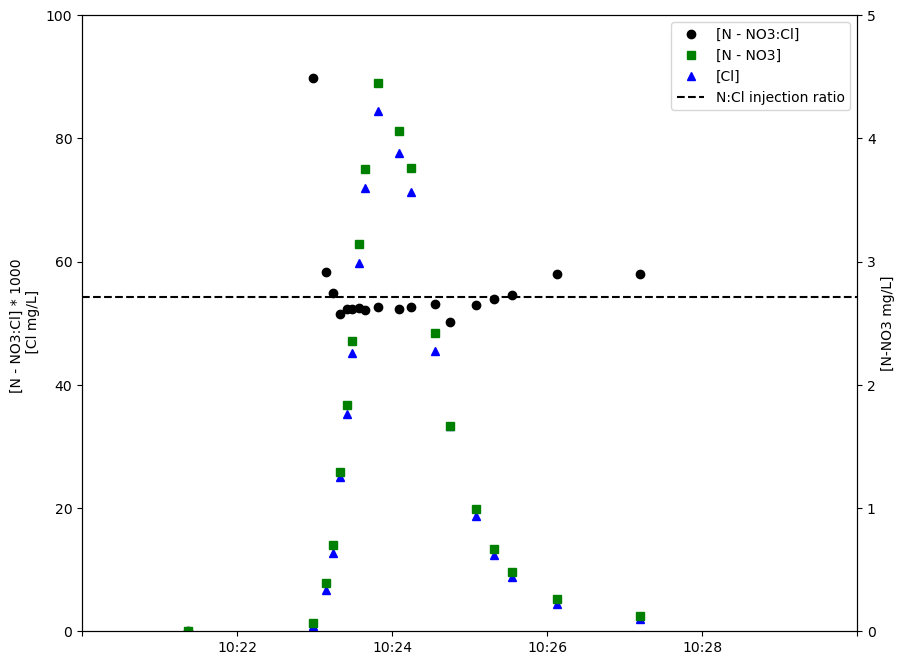

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
ax2 = ax.twinx()

h1, = ax.plot(N_blank_df.loc[3:21, 'Time_collected'], N_blank_df.loc[3:21, 'N:Cl'] * 1000, marker="o", ls='', color='k',label='[N - NO3:Cl]')
h2, = ax2.plot(N_blank_df.loc[3:21, 'Time_collected'], N_blank_df.loc[3:21, 'N-NO3 mg/L'], marker="s", ls='',color='g', label='[N - NO3]')
h3, = ax.plot(N_blank_df.loc[3:21, 'Time_collected'], N_blank_df.loc[3:21, 'Cl_bg_corrected'], marker="^", ls='',color='b', label='[Cl]')

h4 = ax.axhline(cl_N_ratio* 1000, linestyle='dashed', c='black', label='N:Cl injection ratio')
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(dt_range[0], dt_range[-1])
ax.set_ylim(0, 100)
ax2.set_ylim(0, 5)
labels = [item.get_text() for item in ax.get_xticklabels()]
if labels:
    labels[0] = ""
    labels[-1] = ""
    ax.set_xticklabels(labels)
ax.set_ylabel(f'[N - NO3:Cl] * 1000 \n [Cl mg/L]')
ax2.set_ylabel('[N-NO3 mg/L]')
ax.legend(handles=[h1, h2, h3, h4])
plt.show()

Figure 1. Breakthrough curves of solute concentrations observed during the trial with [N-NO3] plotted as squares along the right axis. [Cl] and [N:Cl] plotted along the left axis as triangles, and circles respectively. Note the different magnitudes of y-axes. The dashed line is the N:Cl ratio of the injection solution. The N:Cl ratio is greater than the injection ratio during the beginning and end of the trial. At times of peak solute concentrations the N:Cl values are below the injection ratio, indicating that the N concentrations are decreasing. The mass of Cl is assumed to be completely conserved over the stream length in this trial. NO3 is conservative with respect to abiotic processes (e.g. mineral adsorbtion) so all changes in N concentration are inferred to be related to microbial activity. The increase of N:Cl relative to the injection solution at the start and end of the trial indicate that N concentrations have increased which suggests N is being released or not fully consumed. This may be due to the physical stream characteritics and very cold ambient temperatures. Given that stream beds are composed of thin and patchy sediment deposits overlying ice the stream velocity is likely high and uniform throughout the reach with limited hyporheic zones where stream velocity would decrease and provide more time for microbes to capture nutrients.

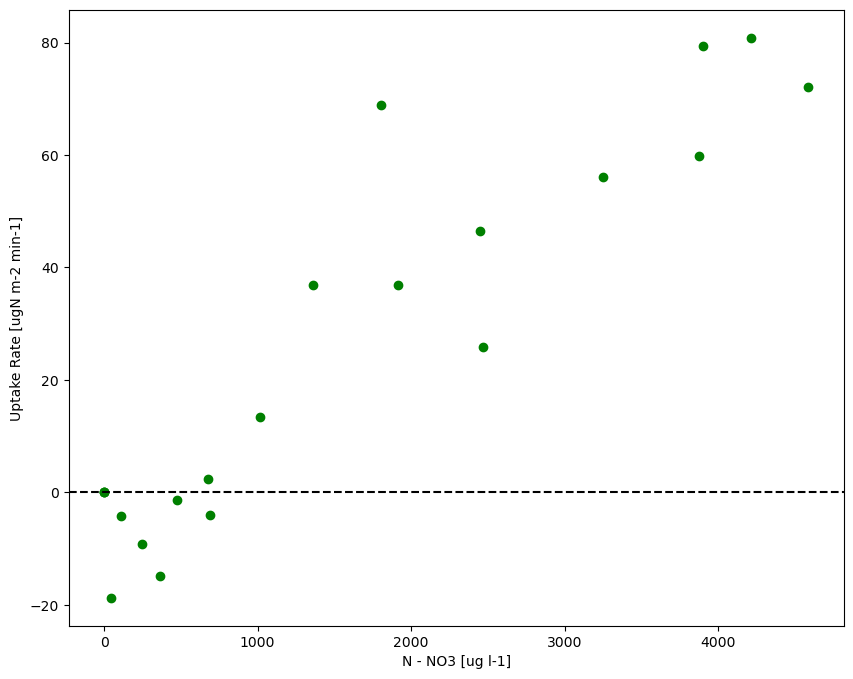

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
# units converted from mg to ug here
ax.scatter(N_blank_df.loc[2:22, 'no3_conc'] * 1000,N_blank_df.loc[2:22,'U_add'] * 1000, marker="o", color='g')
plt.axhline(0, linestyle='dashed', c='black')
ax.set_xlabel('N - NO3 [ug l-1]')
ax.set_ylabel('Uptake Rate [ugN m-2 min-1]')
plt.show()


   Figure 2. Uptake rates cacluated from [N-NO3] concentrations measured for each grab sample during the trial. Note that mass units here are micrograms while figure one units are miligrams. Negative uptake rates support the notion that N is released at low concentrations through this stream segment. Uptake rates are greatest during peak N concentrations which may suggest that microbes only activate when nutrient concentrations reach a certain level and is related to nutrient efficiency in cold environments. This also means that low concentrations of N are exported downstream to area where conditions are more conducive to N uptake.